In [19]:
import glob

image_list = glob.glob("build/data/export/input-*.jpg")
image_list.sort()
len(image_list)

424

In [3]:
# import sys
# stdin_content = sys.stdin.readlines()
stdin_content = """
{
    "input-0001.jpg": [
        [0, 0, 10, 10],
        [15, 15, 42, 42]
    ],
    "input-0002.jpg": [],
    "input-0003.jpg": [
        [0, 0, 10, 10],
        [15, 15, 42, 42],
        [51, 42, 69, 99]
    ]
}
"""

In [4]:
import json
box_dict = json.loads(stdin_content)

In [34]:
# Generate box
import os
from tqdm import tqdm
box_dict = dict()
for i, image_path in tqdm(enumerate(image_list)):
    image_filename = os.path.basename(image_path)
    box_list = []

    if not (200 <= i <= 260):
        # x, y, width, height
        # grandit à la même vitess mais plus grand hauteur quand largeur, commence en haut à gauche
        box_list.append((0, 0, i, 100+i))
        # grandit plus vite en largeur quand hauteur
        # commence plus en bas qu'à droite
        box_list.append((200, 100, 2*i, i))

    box_dict[image_filename] = box_list

424it [00:00, 357967.97it/s]


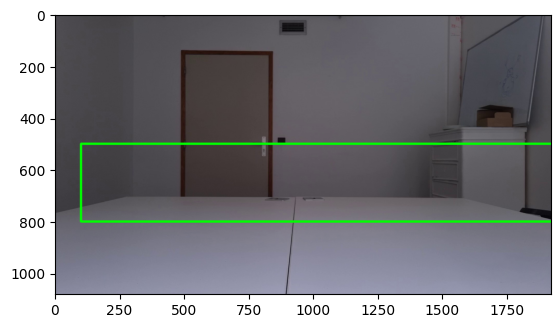

In [25]:
import cv2
from matplotlib import pyplot as plt

# BGR
image = cv2.imread(image_list[5])
image = cv2.rectangle(image, (100,800), (2000,500), (0,255,0), 8)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# cv2.imshow("image",img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [29]:
def coord_matrix_to_opencv(x, y):
    return (y, x)

In [36]:
from tqdm import tqdm
import os

FPS = 30

image = cv2.imread(image_list[0])
height, width, layers = image.shape

video_writer = cv2.VideoWriter("build/data/export.mp4", cv2.VideoWriter_fourcc(*'MP4V'), FPS, (width,height))

for image_path in tqdm(image_list):
    image_filename = os.path.basename(image_path)
    image_box_list = box_dict.get(image_filename, [])
    
    image = cv2.imread(image_path)

    for x, y, width, height in image_box_list:
        opencv_x, opencv_y = coord_matrix_to_opencv(x, y)
        start_point = (opencv_x, opencv_y)
        end_point = (opencv_x+width, opencv_y+height)
        color = (0,255,0) # Green (BGR)
        thickness = 8
        image = cv2.rectangle(image, start_point, end_point, color, thickness)
    
    video_writer.write(image)

print("Generating video...")
video_writer.release()
print("Done.")
    

    

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
100%|██████████| 424/424 [00:15<00:00, 27.38it/s]

Generating video...
Done.


In [35]:
with open("box_stdout_example.json", "w") as f:
    f.write(json.dumps(box_dict))